In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# Read in dataset
iris = pandas.read_csv("iris.csv")

# shuffle rows
shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows,:]

print(iris.head())

# There are 2 species
print("species :",iris.species.unique())

    sepal_length  sepal_width  petal_length  petal_width          species
4            6.5          2.8           4.6          1.5  Iris-versicolor
10           5.0          2.0           3.5          1.0  Iris-versicolor
22           6.3          2.5           4.9          1.5  Iris-versicolor
40           5.5          2.6           4.4          1.2  Iris-versicolor
70           6.9          3.2           5.7          2.3   Iris-virginica
species : ['Iris-versicolor' 'Iris-virginica']


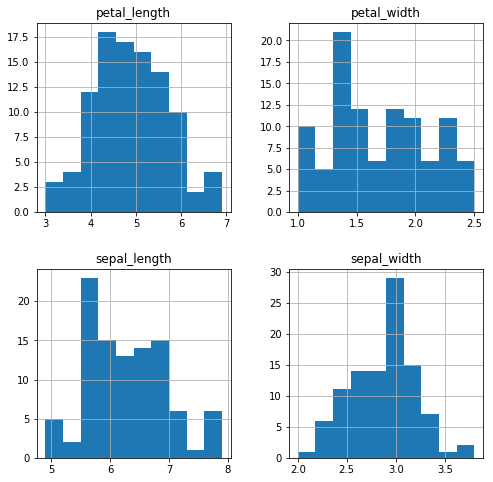

In [3]:
iris.hist(figsize=(8,8))
plt.show()

####  use the popular sigmoid (logistic) activation function because it returns values between 0 and 1 and can be treated as probabilities.

In [4]:
z = np.asarray([[9, 5, 4]])
y = np.asarray([[-1, 2, 4]])

# np.dot is used for matrix multiplication
# z is 1x3 and y is 1x3,  z * y.T is then 1x1
print(np.dot(z,y.T))

# Variables to test sigmoid_activation
iris["ones"] = np.ones(iris.shape[0])
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = (iris.species == 'Iris-versicolor').values.astype(int)

# The first observation
x0 = X[0]

# Initialize thetas randomly 
theta_init = np.random.normal(0,0.01,size=(5,1))

def sigmoid_activation(x,theta):
    x = np.asarray(x)
    theta = np.asarray(theta)
    return 1/(1+np.exp(-np.dot(theta.T,x)))
a1 = sigmoid_activation(x0, theta_init)

print("a1",a1)

[[17]]
a1 [ 0.53160445]


#### compute the cost from just a single observation

In [5]:
# First observation's features and target
x0 = X[0]
y0 = y[0]

# Initialize parameters, we have 5 units and just 1 layer
theta_init = np.random.normal(0,0.01,size=(5,1))
def singlecost(X, y, theta):
    # Compute activation
    h = sigmoid_activation(X.T, theta)
    # Take the negative average of target*log(activation) + (1-target) * log(1-activation)
    cost = -np.mean(y * np.log(h) + (1-y) * np.log(1-h))
    return cost

first_cost = singlecost(x0, y0, theta_init)

first_cost

0.6296684957169747

We can train a single neuron as a two layer network using gradient descent. As we learned in the previous mission, we need to minimize a cost function which measures the error in our model. The cost function measures the difference between the desired output and actual output, defined as:

J(Θ)=−1m∑i=1m(yi∗log(hΘ(xi))+(1−yi)log(1−hΘ(xi)))
Since our targets, yi, are binary, either yi or (1−yi) will equal zero. One of the terms in the summation will disappear because of this result and. the activation function is then used to compute the error. For example, if we observe a true target, yi=1, then we want hΘ(xi) to also be close to 1. So as hΘ(xi) approaches 1, the log(hΘ(xi)) becomes very close to 0. Since the log of a value between 0 and 1 is negative, we must take the negative of the entire summation to compute the cost. The parameters are randomly initialized using a normal random variable with a small variance, less than 0.1.

##### Compute the average gradients over each observation in X and corresponding target y with the initialized parameters theta_init

In [6]:
# Initialize parameters
theta_init = np.random.normal(0,0.01,size=(5,1))

# Store the updates into this array
grads = np.zeros(theta_init.shape)

# Number of observations 
n = X.shape[0]
for j, obs in enumerate(X):
    # Compute activation
    h = sigmoid_activation(obs, theta_init)
    # Get delta
    delta = (y[j]-h) * h * (1-h) * obs
    # accumulate
    grads += delta[:,np.newaxis]/n
    
    
grads

array([[-0.00439775],
       [-0.06851741],
       [-0.02557264],
       [-0.10257984],
       [-0.05126186]])

In the previous mission we learned that we need to compute the partial derivatives of the cost function to get the gradients. Calculating derivatives are more complicated in neural networks than in linear regression. Here we must compute the overall error and then distribute that error to each parameter. Compute the derivative using the chain rule.

∂J∂θj=∂J∂h(Θ)∂h(Θ)∂θj
This rule may look complicated, but we can break it down. The first part is computing the error between the target variable and prediction. The second part then computes the sensitivity relative to each parameter. In the end, the gradients are computed as: δ=(yi−hΘ(xi))∗hΘ(xi)∗(1−hΘ(xi))∗xi.

Now we will step through the math. (yi−hΘ(xi)) is a scalar and the error between our target and prediction. hΘ(xi)∗(1−hΘ(xi)) is also a scalar and the sensitivity of the activation function. xi is the features for our observation i. δ is then a vector of length 5, 4 features plus a bias unit, corresponding to the gradients.

To implement this, we compute δ for each observation, then average to get the average gradient. The average gradient is then used to update the corresponding parameters.

#### We have implemented all these pieces in a single function learn() that can learn this two layer network. After setting a few initial variables, we begin to iterate until convergence. During each iteration we compute our gradients, update accordingly, and compute the new cost.

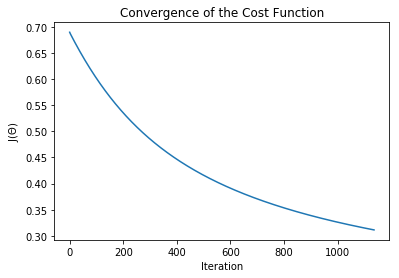

In [7]:
theta_init = np.random.normal(0,0.01,size=(5,1))

# set a learning rate
learning_rate = 0.1
# maximum number of iterations for gradient descent
maxepochs = 10000       
# costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.0001  

def learn(X, y, theta, learning_rate, maxepochs, convergence_thres):
    costs = []
    cost = singlecost(X, y, theta)  # compute initial cost
    costprev = cost + convergence_thres + 0.01  # set an inital costprev to past while loop
    counter = 0  # add a counter
    # Loop through until convergence
    for counter in range(maxepochs):
        grads = np.zeros(theta.shape)
        for j, obs in enumerate(X):
            h = sigmoid_activation(obs, theta)   # Compute activation
            delta = (y[j]-h) * h * (1-h) * obs   # Get delta
            grads += delta[:,np.newaxis]/X.shape[0]  # accumulate
        
        # update parameters 
        theta += grads * learning_rate
        counter += 1  # count
        costprev = cost  # store prev cost
        cost = singlecost(X, y, theta) # compute new cost
        costs.append(cost)
        if np.abs(costprev-cost) < convergence_thres:
            break
        
    plt.plot(costs)
    plt.title("Convergence of the Cost Function")
    plt.ylabel("J($\Theta$)")
    plt.xlabel("Iteration")
    plt.show()
    return theta
        
theta = learn(X, y, theta_init, learning_rate, maxepochs, convergence_thres)

Now that you can compute the gradients, use gradient descent to learn the parameters and predict the species of iris flower given the 4 features. Gradient descent minimizes the cost function by adjusting the parameters accordingly. Adjust the parameters by adding the product of the gradients and the learning rate from the previous parameters. Repeat until the cost function converges or a maximum number of iterations is reached.

The high level algorithm is,

while (number_of_iterations < max_iterations and (prev_cost - cost) > convergence_thres ) {
    update paramaters
    get new cost
    repeat
}

#### Write a function feedforward() that will take in an input X and two sets of parameters theta0 and theta1 to compute the output hΘ(X).

In [8]:
theta0_init = np.random.normal(0,0.01,size=(5,4))
theta1_init = np.random.normal(0,0.01,size=(5,1))
def feedforward(X, theta0, theta1):
    # feedforward to the first layer
    a1 = sigmoid_activation(X.T, theta0).T
    # add a column of ones for bias term
    a1 = np.column_stack([np.ones(a1.shape[0]), a1])
    # activation units are then inputted to the output layer
    out = sigmoid_activation(a1.T, theta1)
    return out

h = feedforward(X, theta0_init, theta1_init)

h

array([[ 0.49947971,  0.49933921,  0.49947062,  0.49940769,  0.49958288,
         0.49934186,  0.49955874,  0.49940817,  0.49938351,  0.49947297,
         0.4996101 ,  0.49939805,  0.4994844 ,  0.49944974,  0.49942978,
         0.49956088,  0.49952726,  0.49948439,  0.49940326,  0.49938334,
         0.49939935,  0.49933987,  0.49951966,  0.4995105 ,  0.49964642,
         0.49962952,  0.49955081,  0.49957634,  0.49948253,  0.4994844 ,
         0.49949148,  0.49952174,  0.49935092,  0.49946035,  0.49942131,
         0.49947774,  0.49949505,  0.49951466,  0.4994869 ,  0.49949044,
         0.49948724,  0.49942106,  0.49956751,  0.49961483,  0.49941194,
         0.49948912,  0.49963538,  0.49941658,  0.49951495,  0.49948197,
         0.49940323,  0.49955659,  0.4994934 ,  0.49947318,  0.49945059,
         0.49951489,  0.49955262,  0.49956605,  0.49957901,  0.49941459,
         0.49956343,  0.49957806,  0.49944483,  0.49956946,  0.4995473 ,
         0.49957754,  0.49958292,  0.4994605 ,  0.4

Neural networks are usually built using multiple layers of neurons. Adding more layers into the network allows you to learn more complex functions. 



We have a 3 layer neural network with four input variables x1,x2,x3, and x4 and a bias unit. Each variable and bias unit is then sent to four hidden units, a1(2),a2(2),a3(2), and a4(2). The hidden units have different sets of parameters θ.

a1(2)=g(θ1,0(1)+θ1,1(1)x1+θ1,2(1)x2+θ1,3(1)x3+θ1,4(1)x4)
a2(2)=g(θ2,0(1)+θ2,1(1)x1+θ2,2(1)x2+θ2,3(1)x3+θ2,4(1)x4)
a3(2)=g(θ3,0(1)+θ3,1(1)x1+θ3,2(1)x2+θ3,3(1)x3+θ3,4(1)x4)
a4(2)=g(θ4,0(1)+θ4,1(1)x1+θ4,2(1)x2+θ4,3(1)x3+θ4,4(1)x4)
θi,k(j) represents the parameter of input unit k which transform the units in layer j to activation unit ai(j+1).

This layer is known as a hidden layer because the user does not directly interact with it by passing or retrieving data. The third and final layer is the output, or prediction, of our model. Similar to how each variable was sent to each neuron in the hidden layer, the activation units in each neuron are then sent to each neuron on the next layer. Since there is only a single layer, we can write it as:

hΘ(X)=g(θ1,0(2)+θ1,1(2)a1(2)+θ1,2(2)a2(2)+θ1,3(2)a3(2)+θ1,4(2)a4(2))
While the mathematical notation may seem confusing at first, at a high level, we are organizing multiple logistic regression models to create a more complex function.

#### Write a function multiplecost() which estimates the cost function

In [9]:
theta0_init = np.random.normal(0,0.01,size=(5,4))
theta1_init = np.random.normal(0,0.01,size=(5,1))

# X and y are in memory and should be used as inputs to multiplecost()
def multiplecost(X, y, theta0, theta1):
    # feed through network
    h = feedforward(X, theta0, theta1) 
    # compute error
    inner = y * np.log(h) + (1-y) * np.log(1-h)
    # negative of average error
    return -np.mean(inner)

c = multiplecost(X, y, theta0_init, theta1_init)

c

0.69315430310100978

Now that we have multiple layers of parameters to learn, we must implement a method called backpropagation. We've already implemented forward propagation by feeding the data through each layer and returning an output. Backpropagation focuses on updating parameters starting at the last layer and circling back through each layer, updating accordingly. As there are multiple layers we are forced to compute ∂∂Θi,j(l)J(Θ) where l is the layer. For a three layer network, use the following approach,

δjl is the 'error' for unit j in layer l
δ3=hΘ(X)−y
δ2=(Θ(2))Tδ3.∗g′(z(2))
There is no δ1 since the first layer are the features and have no error.
We have written code that trains a three layer neural network in the code cell. You will notice that there are many parameters and moving parts to this algorithm. To make the code more modular, we have refactored our previous code as a class, allowing us to organize related attributes and methods.

We have reused feedforward() and multiplecost() but in more condensed forms. During initialization, we set attributes like the learning rate, maximum number of iterations to convergence, and number of units in the hidden layer. In learn() you'll find the backpropagation algorithm, which computes the gradients and updates the parameters. We then test the class by using the features and the species of the flower.

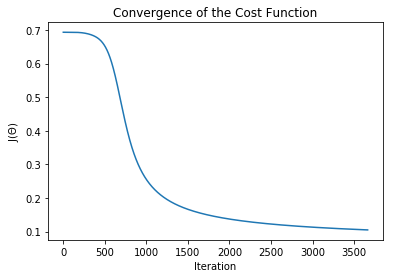

In [10]:
# Use a class for this model
class NNet3:
    def __init__(self, learning_rate=0.5, maxepochs=1e4, convergence_thres=1e-5, hidden_layer=4):
        self.learning_rate = learning_rate
        self.maxepochs = int(maxepochs)
        self.convergence_thres = 1e-5
        self.hidden_layer = int(hidden_layer)
        
    def _multiplecost(self, X, y):
        # feed through network
        l1, l2 = self._feedforward(X) 
        # compute error
        inner = y * np.log(l2) + (1-y) * np.log(1-l2)
        # negative of average error
        return -np.mean(inner)
    
    def _feedforward(self, X):
        # feedforward to the first layer
        l1 = sigmoid_activation(X.T, self.theta0).T
        # add a column of ones for bias term
        l1 = np.column_stack([np.ones(l1.shape[0]), l1])
        # activation units are then inputted to the output layer
        l2 = sigmoid_activation(l1.T, self.theta1)
        return l1, l2
    
    def predict(self, X):
        _, y = self._feedforward(X)
        return y
    
    def learn(self, X, y):
        nobs, ncols = X.shape
        self.theta0 = np.random.normal(0,0.01,size=(ncols,self.hidden_layer))
        self.theta1 = np.random.normal(0,0.01,size=(self.hidden_layer+1,1))
        
        self.costs = []
        cost = self._multiplecost(X, y)
        self.costs.append(cost)
        costprev = cost + self.convergence_thres+1  # set an inital costprev to past while loop
        counter = 0  # intialize a counter

        # Loop through until convergence
        for counter in range(self.maxepochs):
            # feedforward through network
            l1, l2 = self._feedforward(X)

            # Start Backpropagation
            # Compute gradients
            l2_delta = (y-l2) * l2 * (1-l2)
            l1_delta = l2_delta.T.dot(self.theta1.T) * l1 * (1-l1)

            # Update parameters by averaging gradients and multiplying by the learning rate
            self.theta1 += l1.T.dot(l2_delta.T) / nobs * self.learning_rate
            self.theta0 += X.T.dot(l1_delta)[:,1:] / nobs * self.learning_rate
            
            # Store costs and check for convergence
            counter += 1  # Count
            costprev = cost  # Store prev cost
            cost = self._multiplecost(X, y)  # get next cost
            self.costs.append(cost)
            if np.abs(costprev-cost) < self.convergence_thres and counter > 500:
                break

# Set a learning rate
learning_rate = 0.5
# Maximum number of iterations for gradient descent
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.00001  
# Number of hidden units
hidden_units = 4

# Initialize model 
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)
# Train model
model.learn(X, y)

# Plot costs
plt.plot(model.costs)
plt.title("Convergence of the Cost Function")
plt.ylabel("J($\Theta$)")
plt.xlabel("Iteration")
plt.show()

#### we have learned about neural networks, learned about backpropagation, and have code which will train a 3-layer neural network, we will split the data into training and test datasets and run the mode

In [11]:
# First 70 rows to X_train and y_train
# Last 30 rows to X_test and y_test
X_train = X[:70]
y_train = y[:70]
X_test = X[70:]
y_test = y[70:]

#### Compute the AUC score, using roc_auc_score()

In [13]:
from sklearn.metrics import roc_auc_score
# Set a learning rate
learning_rate = 0.5
# Maximum number of iterations for gradient descent
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.00001  
# Number of hidden units
hidden_units = 4

# Initialize model 
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)

model.learn(X_train,y_train)
yhat = model.predict(X_test)[0]
auc = roc_auc_score(y_test,yhat)

auc

0.98660714285714279

To benchmark how well a three layer neural network performs when predicting the species of iris flowers, you will have to compute the AUC, area under the curve, score of the receiver operating characteristic. The function NNet3 not only trains the model but also returns the predictions. The method predict() will return a 2D matrix of probabilities. Since there is only one target variable in this neural network, select the first row of this matrix, which corresponds to the type of flower.